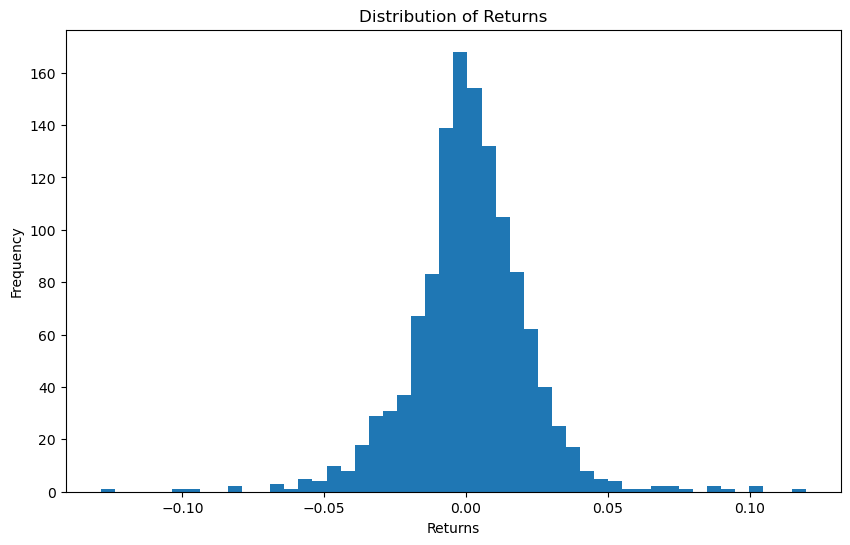

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Loading the dataset
data = pd.read_csv("C:\\Users\\lefen\\Downloads\\AAPL.csv")

# Checking if 'Returns' column exists. If not, we will compute it using the 'Close' column.
if 'Returns' not in data.columns:
    data['Returns'] = data['Close'].pct_change().fillna(0)

# Plotting the distribution of the dataset
plt.figure(figsize=(10, 6))
plt.title("Distribution of Returns")
data['Returns'].plot(kind='hist', bins=50)
plt.xlabel("Returns")
plt.show()

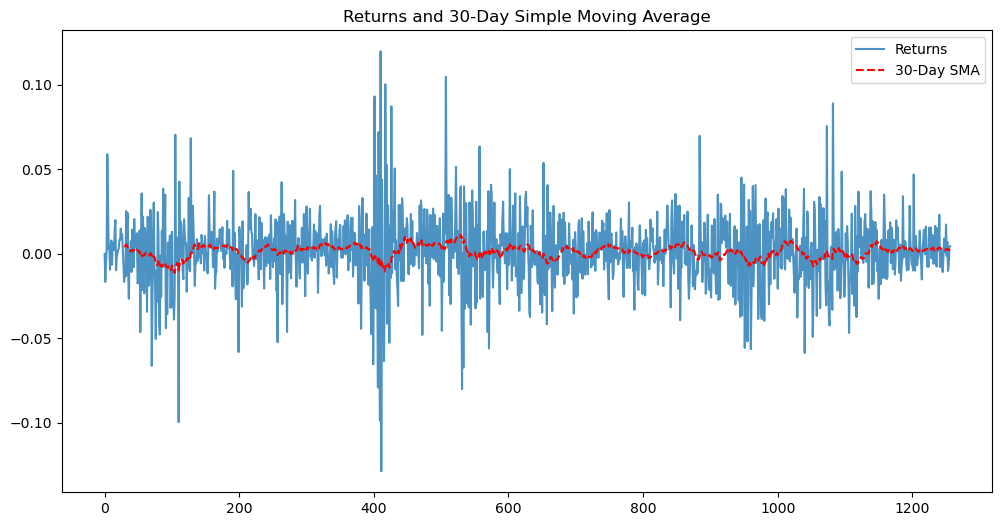

In [3]:
# Calculating the 30-day simple moving average
sma_30 = data['Returns'].rolling(window=30).mean()

# Plotting the original data and the moving average
plt.figure(figsize=(12, 6))
plt.title("Returns and 30-Day Simple Moving Average")
data['Returns'].plot(label='Returns', alpha=0.8)
sma_30.plot(label='30-Day SMA', color='red', linestyle='--')
plt.legend()
plt.show()

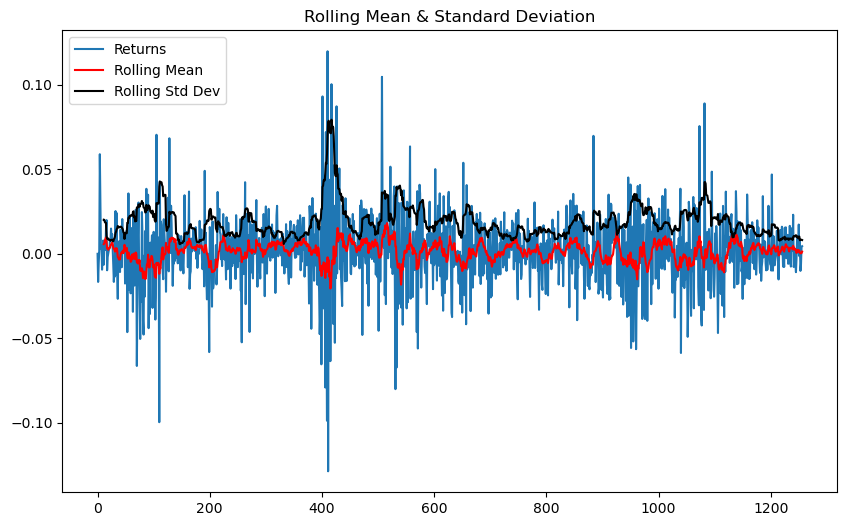

In [4]:
# Plotting Rolling Mean and Standard Deviation
rolling_mean = data['Returns'].rolling(window=12).mean()
rolling_std = data['Returns'].rolling(window=12).std()

plt.figure(figsize=(10, 6))
plt.title("Rolling Mean & Standard Deviation")
data['Returns'].plot()
rolling_mean.plot(label='Rolling Mean', color='red')
rolling_std.plot(label='Rolling Std Dev', color='black')
plt.legend()
plt.show()

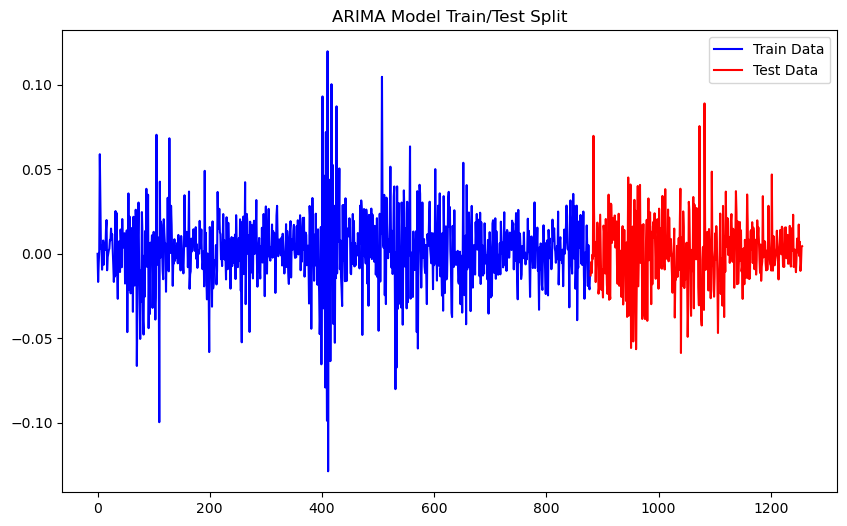

In [23]:
# ARIMA Model Train/Test Split visualization
train_size = int(len(data) * 0.7)
train, test = data['Returns'][:train_size], data['Returns'][train_size:]

plt.figure(figsize=(10, 6))
plt.title("ARIMA Model Train/Test Split")
train.plot(label='Train Data', color='blue')
test.plot(label='Test Data', color='red')
plt.legend()
plt.show()

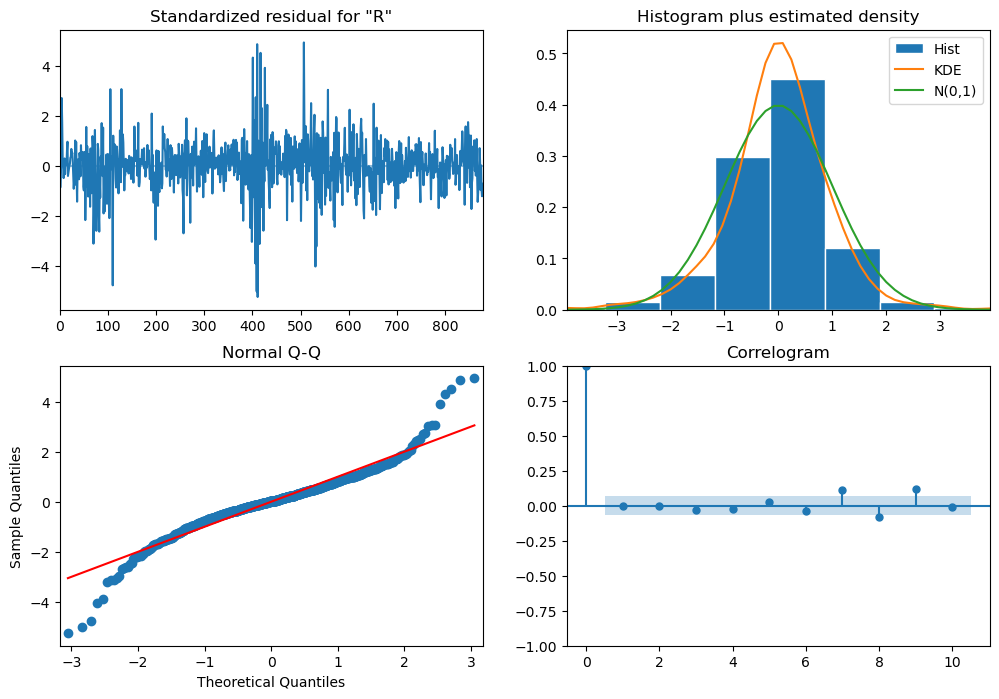

In [24]:
# Fitting the ARIMA model
arima_model = ARIMA(train, order=(1,0,1))
arima_results = arima_model.fit()

# ARIMA Model Diagnostics
fig = arima_results.plot_diagnostics(figsize=(12, 8))
plt.show()

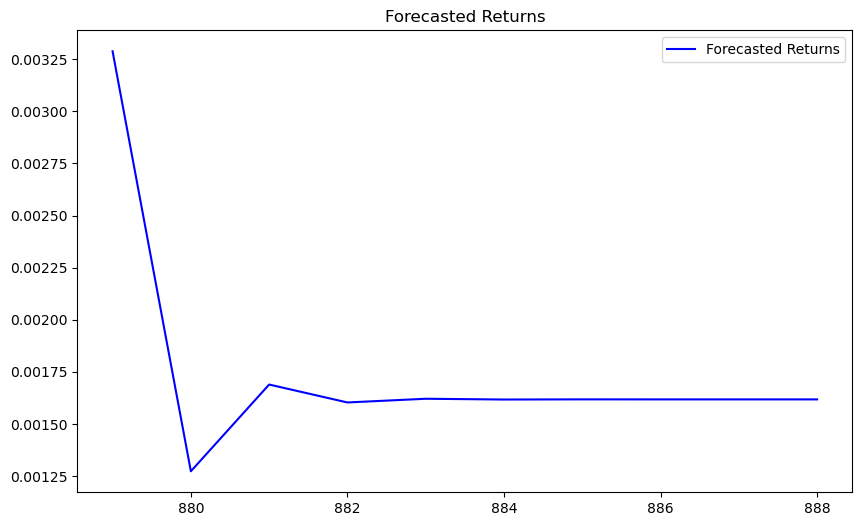

In [39]:
# Forecasting the next 10 daily returns using the ARIMA model
forecast = arima_results.forecast(steps=10)

# Displaying the forecasted returns
plt.figure(figsize=(10, 6))
plt.title("Forecasted Returns")
plt.plot(forecast, color='blue', label='Forecasted Returns')
plt.legend()
plt.show()

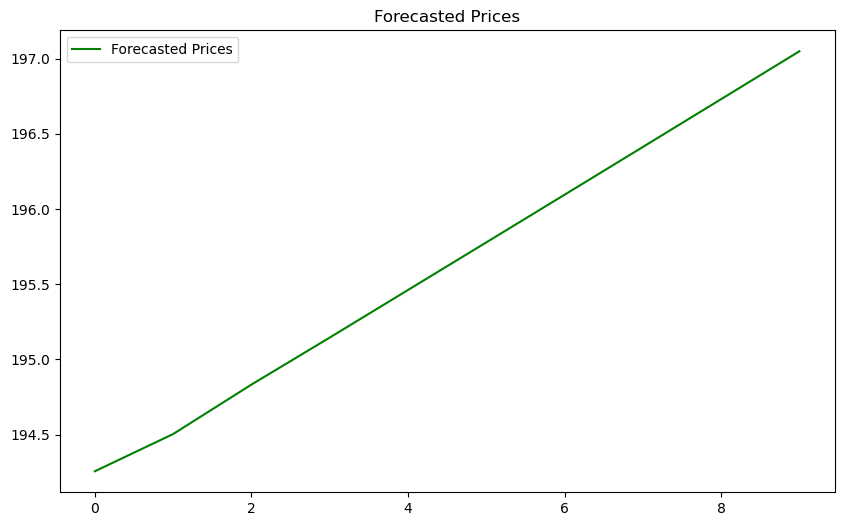

[194.25663678478864,
 194.5040216489861,
 194.8326390899265,
 195.1450738703475,
 195.4614716184557,
 195.7776662990997,
 196.09452058904887,
 196.411857054662,
 196.72971339672134,
 197.0480828200574]

In [40]:
# Converting forecasted returns to forecasted prices
forecasted_prices = [data['Close'].iloc[-1]]  # Start with the last known closing price

for ret in forecast:
    next_price = forecasted_prices[-1] * (1 + ret)
    forecasted_prices.append(next_price)

# Removing the starting price (last known price) to get only the forecasted prices
forecasted_prices = forecasted_prices[1:]

plt.figure(figsize=(10, 6))
plt.title("Forecasted Prices")
plt.plot(forecasted_prices, color='green', label='Forecasted Prices')
plt.legend()
plt.show()
forecasted_prices

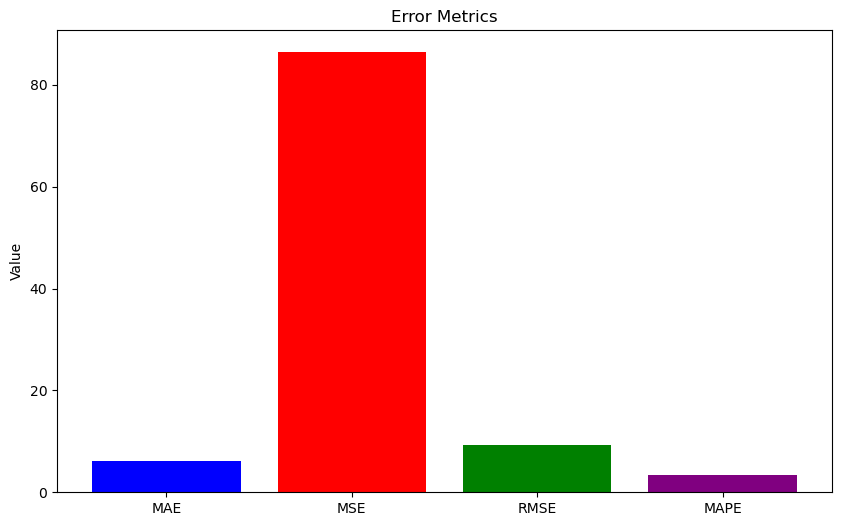

[6.16500404450571, 86.40740047324232, 9.295558104451949, 3.3790074362164644]

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual prices provided by yahoo finance
actual_prices = [194.50, 193.22, 195.83, 196.45, 195.61, 192.58, 191.17, 181.99, 178.85, 179.80]

# Calculating errors
MAE = mean_absolute_error(actual_prices, forecasted_prices)
MSE = mean_squared_error(actual_prices, forecasted_prices)
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((np.array(actual_prices) - np.array(forecasted_prices)) / np.array(actual_prices))) * 100

MAE, MSE, RMSE, MAPE

# Plotting the error metrics
error_metrics = [MAE, MSE, RMSE, MAPE]
labels = ['MAE', 'MSE', 'RMSE', 'MAPE']

plt.figure(figsize=(10, 6))
plt.bar(labels, error_metrics, color=['blue', 'red', 'green', 'purple'])
plt.title('Error Metrics')
plt.ylabel('Value')
plt.show()

error_metrics


In [42]:
import matplotlib.pyplot as plt

# Assuming data is loaded as a DataFrame named data
data_close = data['Close'].values
# Split ratio (i.e., 70% for training and 30% for testing)
split_ratio = 0.7
split_index = int(len(data_close) * split_ratio)
# Train-test split
train = data_close[:split_index]
test = data_close[split_index:]
# Use the last value of the training set to forecast the values of the test set
naive_forecast = [train[-1]] * len(test)
# Calculating the errors between naive forecast and actual test prices
naive_errors = [naive_forecast[i] - test[i] for i in range(len(test))]
# Forecast the next 10 predictions using the naive method
next_10_predictions = [data_close[-1]] * 10
print("Next 10 predictions:", next_10_predictions)
# Given predicted values
provided_forecast = [193.619995] * 10
# Given actual values
provided_actual_prices = [194.50, 193.22, 195.83, 196.45, 195.61, 192.58, 191.17, 181.99, 178.85, 179.80]
# Calculating the errors between provided forecast and provided actual prices
provided_errors = [provided_forecast[i] - provided_actual_prices[i] for i in range(10)]
# Calculating the error metrics for the provided data
provided_MAE = sum(abs(err) for err in provided_errors) / len(provided_errors)
provided_MSE = sum(err**2 for err in provided_errors) / len(provided_errors)
provided_RMSE = provided_MSE**0.5
provided_MAPE = sum(abs(err / actual) for err, actual in zip(provided_errors, provided_actual_prices)) / len(provided_errors) * 100
provided_error_metrics = [provided_MAE, provided_MSE, provided_RMSE, provided_MAPE]
provided_error_metrics

Next 10 predictions: [193.619995, 193.619995, 193.619995, 193.619995, 193.619995, 193.619995, 193.619995, 193.619995, 193.619995, 193.619995]


[5.201998999999998, 56.92734380002489, 7.5450211265459615, 2.840259785667903]

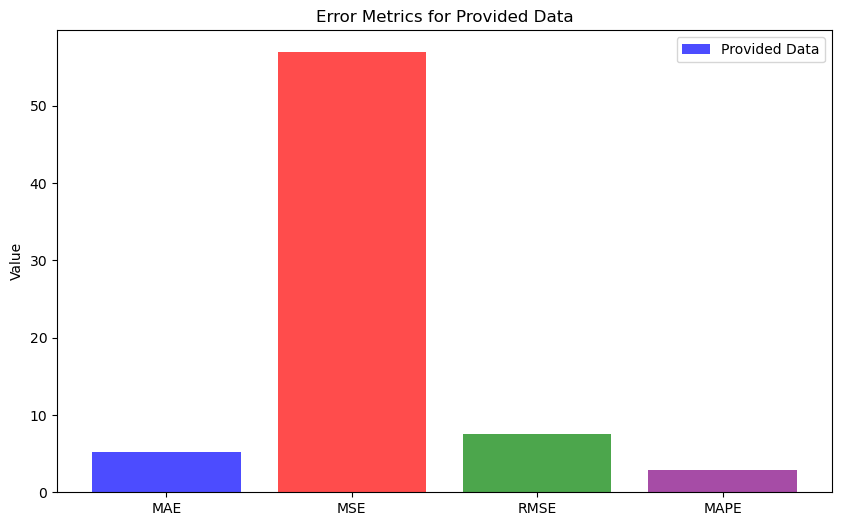

In [45]:
# Plotting the error metrics for the provided data
labels_provided = ['MAE', 'MSE', 'RMSE', 'MAPE']

plt.figure(figsize=(10, 6))
plt.bar(labels_provided, provided_error_metrics, color=['blue', 'red', 'green', 'purple'], alpha=0.7, label='Provided Data')
plt.title('Error Metrics for Provided Data')
plt.ylabel('Value')
plt.legend()
plt.show()


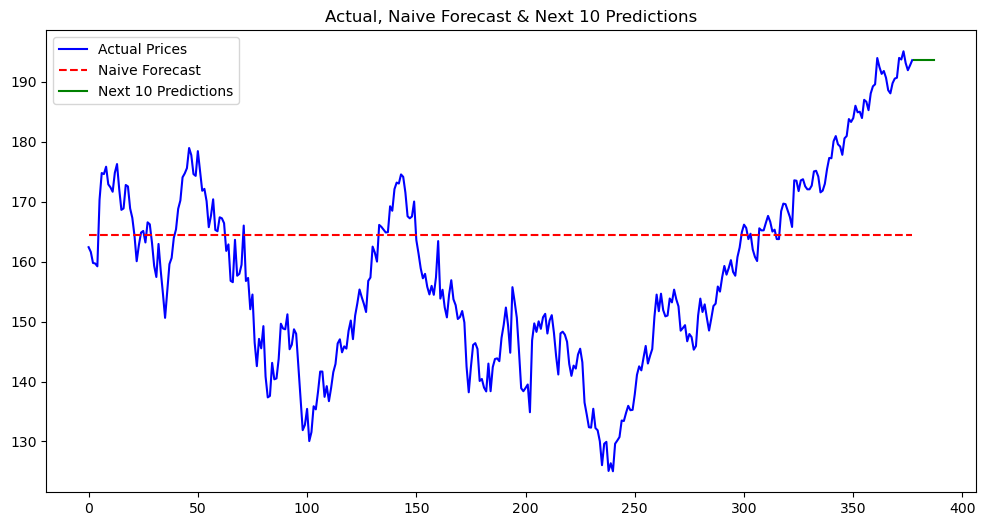

In [43]:
# Plotting the actual closing prices, naive forecast and the next 10 predictions
plt.figure(figsize=(12, 6))
plt.title("Actual, Naive Forecast & Next 10 Predictions")
plt.plot(data_close[split_index:], label='Actual Prices', color='blue')
plt.plot(range(len(test)), naive_forecast, label='Naive Forecast', color='red', linestyle='--')
plt.plot(range(len(test), len(test) + 10), next_10_predictions, label='Next 10 Predictions', color='green', linestyle='-')
plt.legend()
plt.show()